# Klassifisere legendariske pokemon

I denne oppgaven skal vi prøve å klassifisere hvilke pokemon som er legendariske ut ifra data vi har om pokemonen. I datasettet `'pokemon_alopez247.csv'` har vi en tabell med informasjon om alle 721 pokemon fra de første 6 generasjonene. Det første vi må gjøre er å se på hvilken data vi faktisk har.

**Oppgave 1**
Les inn datasettet fra `"../datasets/pokemon/pokemon_alopez247.csv"` og vis frem de første 5 datapunktene

#### Hint:
Det første du må gjøre er å bruke funksjonen `read_csv` til å lese inn tabellen og lagre den i en variabel. Vis frem de første 5 variablene med `'.head()'`

#### Skriv in din kode her:

In [1]:
import pandas as pd
######## Din kode her ########

data = pd.read_csv("../datasets/pokemon/pokemon_alopez247.csv")
data.head()

######## Din kode slutt ########

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


Vi ser at vi har ganske mange egenskaper per pokemon. For å gjøre det enkelt vil vi plukke ut bare 2 av egenskapene. Legendariske pokemon er kjent for å være svært mektige, så det gir kanskje mening å se på hvilke verdier de har for "Attack" og "Special Attack".

**Oppgave 2:**
Hent ut kolonnene `'Sp_Atk'` og `'Attack'` fra tabellen og lagre det i en ny variabel. Hent også ut kolonnen `'isLegendary'` og lagre den i en egen variabel

In [10]:
######## Din kode her ########

data_use = data[['Sp_Atk','Attack']] 
target = data[['isLegendary']]

######## Din kode slutt ########

**Oppgave 3:** Nå som du har hentet ut dataen kan du splitte den i treningsdata og testdata

In [3]:
from sklearn.model_selection import train_test_split 

######## Din kode her ########

train_data, test_data, train_target, test_target = train_test_split(data_use,target, test_size=0.30, random_state=42)

######## Din kode slutt ########

**Oppgave 4:** Vis fram dataene i et scatterplott med `plt.scatter(x,y)`

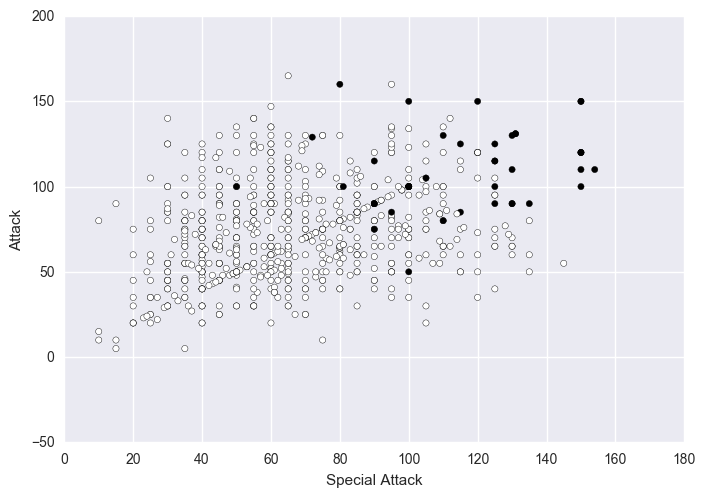

In [4]:
import matplotlib.pyplot as plt
import seaborn

######## Din kode her ########

plt.scatter(data_use['Sp_Atk'],data_use['Attack'],c=target)
plt.xlabel('Special Attack')
plt.ylabel('Attack')
plt.show()

######## Din kode slutt ########

Det kan se ut som det stemmer at legendariske pokemon har sterkere angrep enn vanlige pokemon. Vi ønsker å bruke beslutningstrær til å skille ut de legendariske. 

**Oppgave 5:** 
Lag en beslutningsklassifikator og tren den på treningsdataen. 

In [5]:
from sklearn.tree import DecisionTreeClassifier

######## Din kode her ########

clf = DecisionTreeClassifier()
clf.fit(train_data,train_target)

######## Din kode slutt ########

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

Nå som du har trent klassifikatoren, kan du teste den for å se hvor bra den klassifiserer testdata. 

**Oppgave 6:** Lag en `'ModelTester'` og kjør .test_classifier() for å få fram en forvirringsmatrise og klassifiseringsnøyaktigheten 

Confusion matrix, without normalization


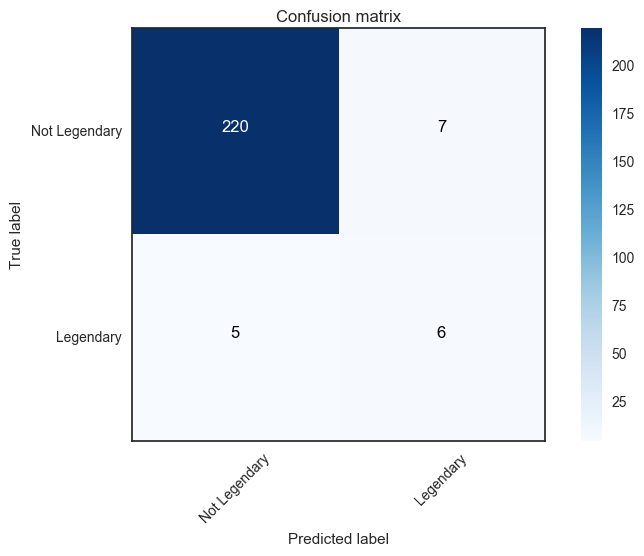

('Accuracy: ', 0, '%')
0.90420874232


In [6]:
from useful_tools import ModelTester
import numpy as np

######## Din kode her ######## 

tester = ModelTester(test_data,test_target)
tester.test_classifier(clf,['Not Legendary','Legendary'],['Sp_Atk','Attack'])

print np.equal(test_target.values,clf.predict(test_data)).mean()
######## Din kode slutt ########

## Hvilke pokemon ble feilklassifiserte?
En måte å analysere klassifiseringen på er å se hva som ble feilklassifisert. Under har vi laget en funksjon ferdig for deg som tar en klassifikator og data, og lister opp navnet på pokemonene som ble klassifisert feil. Kjør cellen for å se resultatet

In [7]:
def print_misclassified_pokemon(clf,data_use,all_data,target):
    predictions = clf.predict(data_use)
    idxs = np.arange(len(predictions))

    true_labels = target.values.ravel()
    feil_klasse_idx = idxs[predictions!=true_labels]

    feil_klasse_0_idx = feil_klasse_idx[true_labels[feil_klasse_idx]==0]
    feil_klasse_1_idx = feil_klasse_idx[true_labels[feil_klasse_idx]==1]

    print "Ikke legendariske pokemon klassifisert som legendariske"  
    for i,fi in enumerate(feil_klasse_0_idx):
        print data.ix[fi]['Name'],"( nummer:", data.ix[fi]['Number'], "generasjon:",data.ix[fi]['Generation'],")"

    print "---"
    print "Legendariske pokemon klassifisert som ikke legendariske"       
    for i,fi in enumerate(feil_klasse_1_idx):
        print data.ix[fi]['Name'],"( nummer:", data.ix[fi]['Number'], "generasjon:",data.ix[fi]['Generation'],")"
        
print_misclassified_pokemon(clf,data_use,data,target)

Ikke legendariske pokemon klassifisert som legendariske
Vileplume ( nummer: 45 generasjon: 1 )
Victreebel ( nummer: 71 generasjon: 1 )
Mew ( nummer: 151 generasjon: 1 )
Octillery ( nummer: 224 generasjon: 2 )
Celebi ( nummer: 251 generasjon: 2 )
Seviper ( nummer: 336 generasjon: 3 )
Empoleon ( nummer: 395 generasjon: 4 )
Rampardos ( nummer: 409 generasjon: 4 )
Manaphy ( nummer: 490 generasjon: 4 )
Genesect ( nummer: 649 generasjon: 5 )
---
Legendariske pokemon klassifisert som ikke legendariske
Moltres ( nummer: 146 generasjon: 1 )
Suicune ( nummer: 245 generasjon: 2 )
Lugia ( nummer: 249 generasjon: 2 )
Regirock ( nummer: 377 generasjon: 3 )
Registeel ( nummer: 379 generasjon: 3 )
Uxie ( nummer: 480 generasjon: 4 )
Cobalion ( nummer: 638 generasjon: 5 )
Virizion ( nummer: 640 generasjon: 5 )
Zygarde ( nummer: 718 generasjon: 6 )


**Oppgave 7:** Hvorfor tror du disse pokemonene ble feilklassifiserte? Skriv inn ditt svar i cellen under

*Ditt svar her:*


En annen måte og undersøke klassifiseringen på er å se på beslutningsgrensa. Cellen under plotter opp treningsdata som sirkler og testdata som kryss sammen med beslutningsgrensa. 

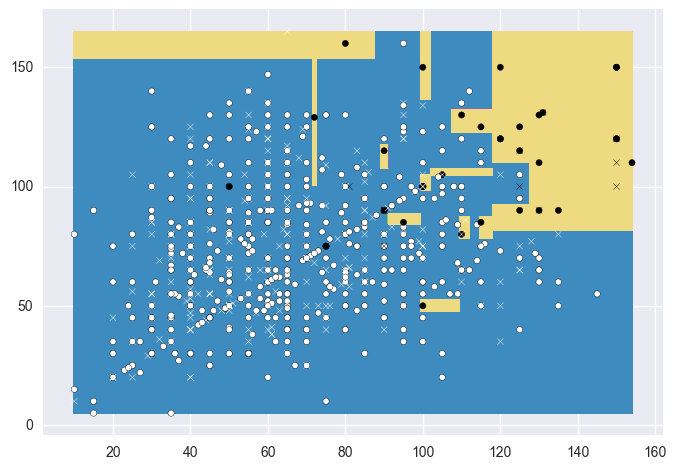

In [8]:
import sys,os
#sys.path.append(os.path.split(os.path.abspath(os.getcwd()))[0])
from useful_tools import plot_boundary
plot_boundary(data_use.values,clf)
plt.scatter(train_data['Sp_Atk'],train_data['Attack'],c=train_target,marker='o')
plt.scatter(test_data['Sp_Atk'],test_data['Attack'],c=test_target,marker='x')
plt.show()

**Oppgave 8:**  Hva synes du om beslutningsgrensa? Ser det ut som den vil generalisere bra for nye data? Har den funnet det underliggende mønsteret? Prøv å gå tilbake til oppgave 5 og lag et beslutningstre med høyere grense for minimum løvnoder. Kjør så cellene etter oppgave 5 på nytt. Er resultatet bedre?

**Hint:** `'DecisionTreeClassifier(min_samples_leaf=2)'`

Det kan se ut som vi trenger å legge til en egenskap som er bedre til å skille ut pokemon som er sterke, men ikke legendariske. En ting vi kanskje kan bruke er kolonnen `'has_gender'`. Legendariske pokemon pleier som regel ikke å ha kjønn. 

**Oppgave 9**: Prøv å lage en bedre klassifikator med hjelp av flere egenskaper. F. eks `'has_gender'` eller en annen egenskap du tror kan være viktig. Hva er den beste testnøyaktigheten du kan få? Prøv gjerne en annen algoritme enn beslutningstrær og se om resultatet blir annerledes. 


In [11]:
######## Din kode her ######## 


######## Din kode slutt ########